# Question

## Output variable -> y
## y -> Whether the client has subscribed a term deposit or not 
## Binomial ("yes" or "no")

## Import libraries

In [1]:
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

## Load the data set

In [2]:
data = pd.read_csv(r'C:\Users\ROHINI\Downloads\bank-full (2).csv',sep = ";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.shape

(45211, 17)

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Data Pre-Processing

### Remove null values


In [8]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Remove outliers

<AxesSubplot:xlabel='duration'>

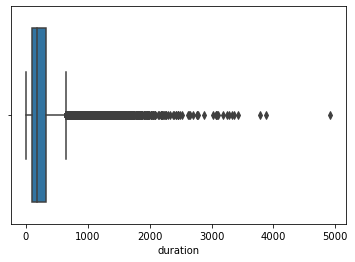

In [9]:
sb.boxplot(data=data,x='duration')

## Removing the outliers

<AxesSubplot:xlabel='duration'>

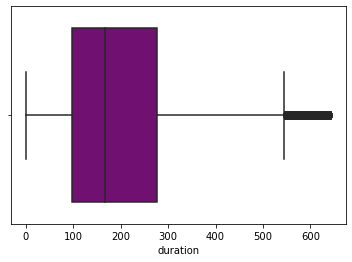

In [10]:
q3 = data['duration'].quantile(.75)
q1 = data['duration'].quantile(.25)
iqr = q3-q1
iqr
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data1 = data[(data['duration']>bottomrange) & (data['duration']<upperrange)] 
sb.boxplot(data=data1,x='duration',color = 'purple')

## Exploratory Data Analysis

### shows the no.of customers vs Client's Term Deposit Subscription Status

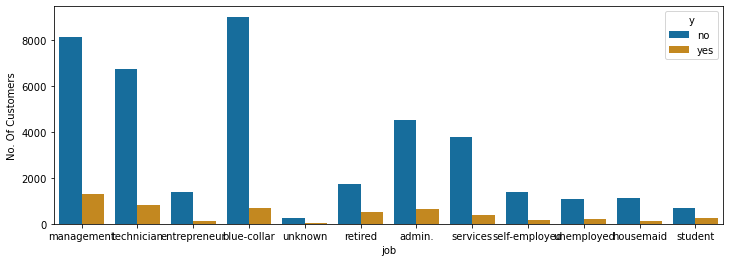

In [11]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sb.countplot(x ='job', hue = 'y', data = data, palette = 'colorblind')
plt.ylabel('No. Of Customers')
plt.show()

## Label encoding

In [12]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
        if data[column].dtype == np.number:
            continue
        data[column] = LabelEncoder().fit_transform(data[column])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


## Correlation visualization

<function matplotlib.pyplot.show(close=None, block=None)>

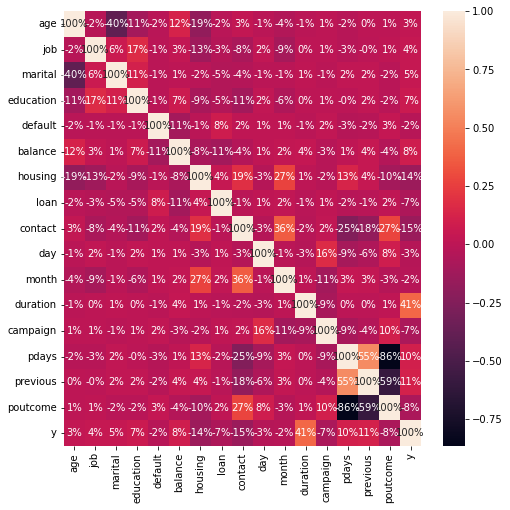

In [13]:
plt.subplots(figsize=(8,8))
sb.heatmap(data.corr(), annot = True, fmt = '0.0%')
plt.show

## Splitting data into Train and test

In [14]:
#split data into 70% training and 30% testing.
from sklearn.model_selection import train_test_split
X = data.iloc[:, 1:data.shape[1]].values
Y = data.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)
X_train

array([[1, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 0, 3, 0],
       [9, 1, 1, ..., 0, 3, 0],
       ...,
       [4, 1, 2, ..., 0, 3, 0],
       [0, 1, 3, ..., 0, 3, 0],
       [1, 1, 3, ..., 2, 1, 0]], dtype=int64)

## Split Data into Independent ‘X’ and Dependent ‘Y’ Variables

In [15]:
#Split the data into independent 'X' and dependent 'Y' variables
X = data.iloc[:, 1:data.shape[1]].values
Y = data.iloc[:, 0].values
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


# Logistic Regression Model Building

In [ ]:
#Logistic Regression model building
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver = 'sag',random_state=100,multi_class='ovr')
logmodel.fit(X_train,Y_train)

In [ ]:
#Training Model Score
logmodel.score(X_train,Y_train)

In [ ]:
#Testing Model Score
logmodel.score(X_test,Y_test)

In [ ]:
#intercept 𝑏₀
logmodel.intercept_

In [ ]:
#slope 𝑏₁
logmodel.coef_

### In the matrix below, each row corresponds to a single observation. 
### The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
### The second column is the probability that the output is one, or 𝑝(𝑥).


In [ ]:
logmodel.predict_proba(X)

#### This function returns the predicted output values as a one-dimensional array.

In [ ]:
logmodel.predict(X)

## Select columns

In [ ]:
columns = ['age', 'balance', 'duration', 'campaign', 'y']
bank_full = data[columns]
bank_full.info()

In [ ]:
pd.crosstab(bank_full.age,bank_full.y).plot(kind="line")

### graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody.

In [ ]:
sb.boxplot(data =bank_full,orient = "v")

In [ ]:
bank_full['outcome'] = bank_full.y.map({'no':0, 'yes':1})
bank_full.tail(10)

### probably not a great feature since lot of outliers

In [ ]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = bank_full[feature_col]
Y = bank_full[output_target]

In [ ]:
X

In [ ]:
Y

In [ ]:
classifier = LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print (confusion_matrix)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,logmodel.predict(X_test))
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]
print(cm)
print('The model testing accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

In [ ]:
import seaborn as sb
sb.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')
plt.show

# Conclusion

#### To summarize the article, we learned why to use logistic regression algorithm and how to perform it using python. I also learned the flow and necessary steps to take before building the logistic regression model. This was a basic logistic regression model.

#### Further, to enhance the model for better results, you need to apply resampling techniques such as oversampling, undersampling or SMOTE when dealing with such imbalanced datasets. Imbalanced data means datasets where the target class has an uneven distribution of observations, i.e. in our case, the variable Term Deposit subscription status has two classes. The class “no”  has a very high number of observations, and the clas ‘yes” one class label has a very high number of observations, and the other has a very low number of observations.